In [387]:
import numpy as np
import pandas as pd
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

## 1. Load Data

In [388]:
df = pd.read_csv(r'C:\Users\This PC\OneDrive\Desktop\todo\highRadius\Day2\H2HBABBA1591.csv')
print(df.shape)
df.head()

(50000, 19)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200726979,BJ'S foundation,NaN,2020.0,1.930875e+09,2020-05-06,20200507,20200506,20200521.0,USD,RV,1.0,NaN,1072.61,20200506.0,NAA8,1.930875e+09,1
1,U013,0140101584,DICK foundation,2020-03-19 00:00:00,2020.0,1.991839e+09,2020-02-03,20200201,20200203,20200319.0,USD,RV,1.0,NaN,11483.61,20200203.0,NAVF,1.991839e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-10-30 00:00:00,2019.0,1.930029e+09,2019-10-19,20191018,20191019,20191103.0,USD,RV,1.0,NaN,14722.65,20191019.0,NAH4,1.930029e+09,0
3,U001,0200794332,COST trust,2019-04-04 00:00:00,2019.0,1.929002e+09,2019-03-21,20190320,20190321,20190405.0,USD,RV,1.0,NaN,5087.80,20190321.0,NAAX,1.929002e+09,0
4,U001,0200881076,ALBERT co,2019-11-04 00:00:00,2019.0,1.930036e+09,2019-10-20,20191021,20191020,20191104.0,USD,RV,1.0,NaN,82419.90,20191020.0,NAA8,1.930036e+09,0


### 1.1. Collect Information regarding our data

In [389]:
df.dtypes,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

(business_code              object
 cust_number                object
 name_customer              object
 clear_date                 object
 buisness_year             float64
 doc_id                    float64
 posting_date               object
 document_create_date        int64
 document_create_date.1      int64
 due_in_date               float64
 invoice_currency           object
 document type              object
 posting_id                float64
 area_business             float64
 total_open_amount         float64
 baseline_create_date      float64
 cust_payment_terms         object
 invoice_id                float64
 isOpen                      int64
 dtype: object,
 None)

# 2. Slicing all rows with NaN in clear_date

The code written below is to split the rows into 'Test' and 'df' 

In [390]:
Test = df[df['clear_date'].isnull()]
print(Test.shape)
df = df[df['clear_date'].notnull()]
print(df.shape)

(10000, 19)
(40000, 19)


# 3. Preprocessing

### 3.1 Check for null columns and drop them after analysing there impact on prediction to be made

In [391]:
#Check the total numbers of null rows for each feature or column
print(df.isnull().sum())
print("*"*70)
#Remove column area_business as it has all its values == null, invoice_id with nan and some not needed columns
df.drop('area_business', axis=1, inplace=True)
df.drop('document_create_date.1', axis=1, inplace=True)
df.dropna(subset=['invoice_id'], inplace=True)
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64
**********************************************************************


business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
document type           0
posting_id              0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              0
isOpen                  0
dtype: int64

### 3.2 Remove the columns which has only 1 unique value, Spliting Columns for exact date and find the delay days

In [392]:
#Remove all columns which has more duplicate values or number of unique values is less than 2
df.head()
unique_cols =  [x for x in df.columns if df[x].nunique()==1] 
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
print(df.columns)
print("*"*80)
#split the columns for day, month and year for clear_date and due_date
#Change the datatype of all date columns
df['clear_date']=pd.to_datetime(df.clear_date)
df['due_in_date']=pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['document_create_date']=pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['clear_date'] = df['clear_date'].dt.date
df['due_in_date'] = df['due_in_date'].dt.date

df['posting_date']=pd.to_datetime(df['posting_date']).dt.date
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date']).dt.date
df['document_create_date']=pd.to_datetime(df['document_create_date']).dt.date
df['late_after_due_posting'] = (df['due_in_date'] - df['posting_date']).dt.days
df['late_after_due_baseline'] = (df['due_in_date'] - df['baseline_create_date']).dt.days
df['late_after_due_doc_create'] = (df['due_in_date'] - df['document_create_date']).dt.days

df['late_after_posting_baseline'] = (df['posting_date'] - df['baseline_create_date']).dt.days
df['late_after_posting_doc_create'] = (df['posting_date'] - df['document_create_date']).dt.days

df['late_after_baseline_doc_create'] = (df['baseline_create_date'] - df['document_create_date']).dt.days

df['delay_days'] = (df['clear_date'] - df['due_in_date']).dt.days

print(df.info())
print("*"*80)
df.head()

['document type', 'posting_id', 'isOpen']
Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id'],
      dtype='object')
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39992 entries, 1 to 49998
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   business_code                   39992 non-null  object 
 1   cust_number                     39992 non-null  object 
 2   name_customer                   39992 non-null  object 
 3   clear_date                      39992 non-null  object 
 4   buisness_year                   39992 non-null  float64
 5   doc_id                          39992 n

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,baseline_create_date,cust_payment_terms,invoice_id,late_after_due_posting,late_after_due_baseline,late_after_due_doc_create,late_after_posting_baseline,late_after_posting_doc_create,late_after_baseline_doc_create,delay_days
1,U013,0140101584,DICK foundation,2020-03-19,2020.0,1.991839e+09,2020-02-03,2020-02-01,2020-03-19,USD,...,2020-02-03,NAVF,1.991839e+09,45,45,47,0,2,2,0
2,U001,0200769623,WAL-MAR foundation,2019-10-30,2019.0,1.930029e+09,2019-10-19,2019-10-18,2019-11-03,USD,...,2019-10-19,NAH4,1.930029e+09,15,15,16,0,1,1,-4
3,U001,0200794332,COST trust,2019-04-04,2019.0,1.929002e+09,2019-03-21,2019-03-20,2019-04-05,USD,...,2019-03-21,NAAX,1.929002e+09,15,15,16,0,1,1,-1
4,U001,0200881076,ALBERT co,2019-11-04,2019.0,1.930036e+09,2019-10-20,2019-10-21,2019-11-04,USD,...,2019-10-20,NAA8,1.930036e+09,15,15,14,0,-1,-1,0
5,CA02,0140105686,SYSC systems,2019-09-26,2019.0,2.960578e+09,2019-09-04,2019-09-04,2019-09-21,CAD,...,2019-09-11,CA10,2.960578e+09,17,10,17,-7,0,7,5


### 3.3 Sort data according to posting date and also find a unique_id using cust_number and name_customer to represent all rows 

In [393]:
df=df.sort_values(by='posting_date', ascending=True)
df['unique_id'] = df['cust_number'].astype(str)+"_"+df['name_customer'].astype(str)
print(df['cust_number'].nunique())
print(df['unique_id'].nunique())
df.head()

1320
5465


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,cust_payment_terms,invoice_id,late_after_due_posting,late_after_due_baseline,late_after_due_doc_create,late_after_posting_baseline,late_after_posting_doc_create,late_after_baseline_doc_create,delay_days,unique_id
12931,U001,CCU002,KRFT FDS llc,2019-03-01,2019.0,1.928536e+09,2018-12-30,2018-12-31,2019-02-03,USD,...,NAG2,1.928536e+09,35,35,34,0,-1,-1,26,CCU002_KRFT FDS llc
22345,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,...,NAA8,1.928541e+09,15,15,16,0,1,1,1,0200726979_BJ'S corporation
13849,U001,0200778998,CE,2019-01-11,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,...,NAA8,1.928540e+09,15,15,16,0,1,1,-3,0200778998_CE
275,U001,0200726979,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,...,NAA8,1.928538e+09,15,15,16,0,1,1,1,0200726979_BJ'S llc
11611,U001,0200726979,BJ'S corp,2019-01-15,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,USD,...,NAA8,1.928539e+09,15,15,16,0,1,1,1,0200726979_BJ'S corp


### 3.4 Drop name_customer as the unique_id can be used as the key for identification

In [394]:
df['clear_date']=pd.to_datetime(df.clear_date)
df['due_in_date']=pd.to_datetime(df.due_in_date)
df['baseline_create_date']=pd.to_datetime(df.baseline_create_date)
df['document_create_date']=pd.to_datetime(df.document_create_date)
df['posting_date']=pd.to_datetime(df.posting_date)
df.drop(['name_customer'], axis=1, inplace=True)
print(df.dtypes)
print("*"*80)
print(df.info())
print(df.shape)

business_code                             object
cust_number                               object
clear_date                        datetime64[ns]
buisness_year                            float64
doc_id                                   float64
posting_date                      datetime64[ns]
document_create_date              datetime64[ns]
due_in_date                       datetime64[ns]
invoice_currency                          object
total_open_amount                        float64
baseline_create_date              datetime64[ns]
cust_payment_terms                        object
invoice_id                               float64
late_after_due_posting                     int64
late_after_due_baseline                    int64
late_after_due_doc_create                  int64
late_after_posting_baseline                int64
late_after_posting_doc_create              int64
late_after_baseline_doc_create             int64
delay_days                                 int64
unique_id           

### 3.5  Drop rows with same unique_id and invoice_id as it belongs to same company and invoice_id is also same

In [395]:
print('Before Dropping : ', df.shape)
#drop all rows with same unique_id and  invoice_id 
indexNames = df[df.unique_id.duplicated() & df.invoice_id.duplicated()].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.drop('document_create_date',axis=1,inplace=True)
print('After Dropping : ', df.shape)
print("*"*70)
print(df.info())
print("*"*70)
df.head()

Before Dropping :  (39992, 21)
After Dropping :  (39147, 20)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39147 entries, 12931 to 23186
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   39147 non-null  object        
 1   cust_number                     39147 non-null  object        
 2   clear_date                      39147 non-null  datetime64[ns]
 3   buisness_year                   39147 non-null  float64       
 4   doc_id                          39147 non-null  float64       
 5   posting_date                    39147 non-null  datetime64[ns]
 6   due_in_date                     39147 non-null  datetime64[ns]
 7   invoice_currency                39147 non-null  object        
 8   total_open_amount               39147 non-null  float64       
 9   ba

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,late_after_due_posting,late_after_due_baseline,late_after_due_doc_create,late_after_posting_baseline,late_after_posting_doc_create,late_after_baseline_doc_create,delay_days,unique_id
12931,U001,CCU002,2019-03-01,2019.0,1.928536e+09,2018-12-30,2019-02-03,USD,2108.62,2018-12-30,NAG2,1.928536e+09,35,35,34,0,-1,-1,26,CCU002_KRFT FDS llc
22345,U001,0200726979,2019-01-15,2019.0,1.928541e+09,2018-12-30,2019-01-14,USD,111.22,2018-12-30,NAA8,1.928541e+09,15,15,16,0,1,1,1,0200726979_BJ'S corporation
13849,U001,0200778998,2019-01-11,2019.0,1.928540e+09,2018-12-30,2019-01-14,USD,45620.84,2018-12-30,NAA8,1.928540e+09,15,15,16,0,1,1,-3,0200778998_CE
275,U001,0200726979,2019-01-15,2019.0,1.928538e+09,2018-12-30,2019-01-14,USD,240.86,2018-12-30,NAA8,1.928538e+09,15,15,16,0,1,1,1,0200726979_BJ'S llc
11611,U001,0200726979,2019-01-15,2019.0,1.928539e+09,2018-12-30,2019-01-14,USD,113.06,2018-12-30,NAA8,1.928539e+09,15,15,16,0,1,1,1,0200726979_BJ'S corp


### 3.5 Understanding the details of clear_date

In [396]:
#Found this description about clear_date as I will use it to split dataframe to train, val and test
df['clear_date'].describe(datetime_is_numeric=True)

count                            39147
mean     2019-08-09 05:19:32.779523328
min                2019-01-03 00:00:00
25%                2019-04-30 00:00:00
50%                2019-08-06 00:00:00
75%                2019-11-15 00:00:00
max                2020-05-21 00:00:00
Name: clear_date, dtype: object

The code above is used to see all details about clear_date that will help me in splitting dataset. 

# 4. Split dataset to Train, Test and Validation dataframes

The code written below is used to split dataset into Train, Validation and Test set in a date-wise manner.

In [397]:
#Now drop the delay_days column or create a new dataframe df_new using all required features
df_new = df[['business_code', 'cust_number' ,'buisness_year', 'doc_id',
       'posting_date', 'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'clear_date' ,'cust_payment_terms', 'invoice_id',
       'late_after_due_posting', 'late_after_due_baseline',
       'late_after_due_doc_create', 'late_after_posting_baseline',
       'late_after_posting_doc_create', 'late_after_baseline_doc_create','unique_id']]
#The dataframe for clear_date is from '2019-01-03' to '2020-05-21'
X_train=df_new[df_new['clear_date'] <= '2020-01-21'].copy()
df_temp=df_new[df_new['clear_date'] > '2020-01-21'].copy()
#now we will take 2 months for df_val and df_test each
X_val=df_temp[df_temp['clear_date'] <= '2020-03-21'].copy()
X_test=df_temp[df_temp['clear_date'] > '2020-03-21'].copy()

#X_train=df_train[['cust_payment_terms' , 'total_open_amount', 'unique_id'  , 'invoice_currency' , 'business_code']].copy()
#X_val=df_val[['cust_payment_terms' , 'total_open_amount' , 'unique_id' , 'invoice_currency' , 'business_code']].copy()
#X_test=df_test[['cust_payment_terms' , 'total_open_amount' , 'unique_id' , 'invoice_currency' , 'business_code']].copy()

print('Training data :- ', X_train.shape)
print('Validation data :- ', X_val.shape)
print('Testing data :- ', X_test.shape)

#Perform the Train, Val split by keeping in mind that the type of split depends on nature of data so I will use the clear_date
df_target = df[['delay_days', 'clear_date']].copy()
#make df_target_train, df_target_val and df_target_test using the old dataframe df
df_target_train=df_target[df_target['clear_date'] <= '2020-01-21'].copy()
df_target_temp=df_target[df_target['clear_date'] > '2020-01-21'].copy()
df_target_val=df_target_temp[df_target_temp['clear_date'] <= '2020-03-21'].copy()
df_target_test=df_target_temp[df_target_temp['clear_date'] > '2020-03-21'].copy()

y_train=df_target_train['delay_days']
y_val=df_target_val['delay_days']
y_test=df_target_test['delay_days']

print("*"*40)
print('Target Training data :- ', y_train.shape)
print('Target Validation data :- ', y_val.shape)
print('Target Testing data :- ', y_test.shape)
print("*"*40)
print(X_train.info())

Training data :-  (34763, 19)
Validation data :-  (4132, 19)
Testing data :-  (252, 19)
****************************************
Target Training data :-  (34763,)
Target Validation data :-  (4132,)
Target Testing data :-  (252,)
****************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   34763 non-null  object        
 1   cust_number                     34763 non-null  object        
 2   buisness_year                   34763 non-null  float64       
 3   doc_id                          34763 non-null  float64       
 4   posting_date                    34763 non-null  datetime64[ns]
 5   due_in_date                     34763 non-null  datetime64[ns]
 6   invoice_currency                34763 non-null  object        
 7   

# 5. EDA

Skewness :  4.417710991153607


c:\users\this pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay_days', ylabel='Density'>

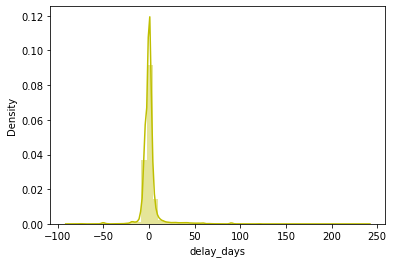

In [398]:
print('Skewness : ', df_target['delay_days'].skew())
sns.distplot(y_train,color='y')

From the above distplot we can see that the skewness is very less and it is somewhat right skewed

## 5.1 Correlation matrix for multivariate analysis

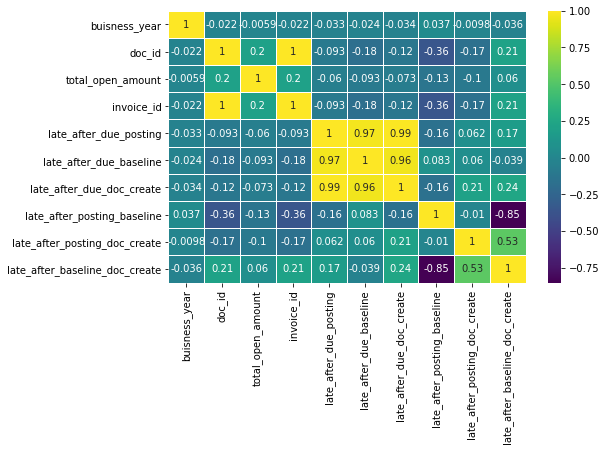

In [399]:
#analyse the train set using a Multivariate Analysis techniques i.e. Correlation matrix 
cormat=X_train.corr()
plt.figure(figsize=(8,5))
g= sns.heatmap(cormat,annot=True,cmap='viridis',linewidths=.5)

From the above multivaiate analysis we can see some highly correlated features and can be dropped during Feature Selection if there correlation with our target is very poor.

In [400]:
#Let's build the final train set by joining both X_train and y_train 
final_train_set=X_train.join(y_train)
df.columns

Index(['business_code', 'cust_number', 'clear_date', 'buisness_year', 'doc_id',
       'posting_date', 'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id',
       'late_after_due_posting', 'late_after_due_baseline',
       'late_after_due_doc_create', 'late_after_posting_baseline',
       'late_after_posting_doc_create', 'late_after_baseline_doc_create',
       'delay_days', 'unique_id'],
      dtype='object')

<AxesSubplot:xlabel='late_after_baseline_doc_create', ylabel='delay_days'>

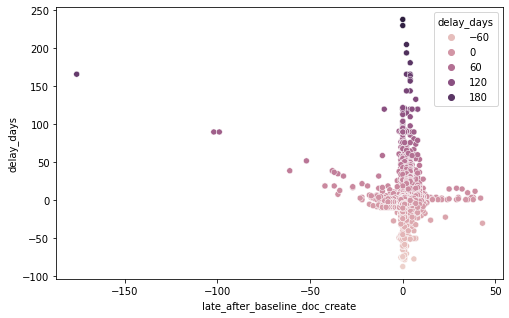

In [401]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='late_after_baseline_doc_create', y='delay_days', data=final_train_set, hue='delay_days')

The above Scatter plot shows the pattern to be somewhat linear but at 0 the density of points increases and that might not help our model in predicting correctly. 

<AxesSubplot:xlabel='late_after_posting_doc_create', ylabel='delay_days'>

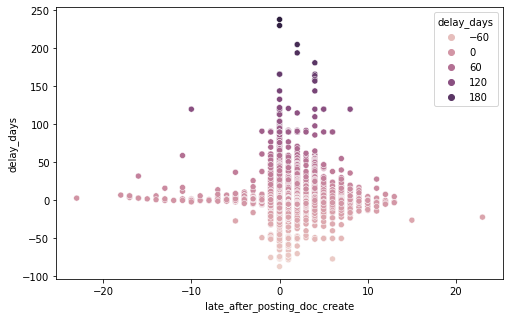

In [402]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='late_after_posting_doc_create', y='delay_days', data=final_train_set, hue='delay_days') 

The above Scatter plot shows an unusual pattern but at 0 the density of points increases and that might not help our model in predicting correctly. 

<AxesSubplot:xlabel='late_after_posting_baseline', ylabel='delay_days'>

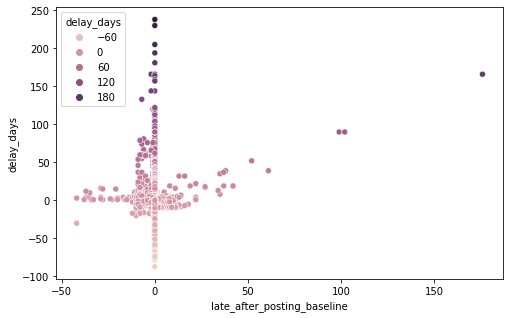

In [403]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='late_after_posting_baseline', y='delay_days', data=final_train_set, hue='delay_days') 

The above scatter plot also linearly increases with delay but at 0 the density again increases and can confuse our model.

<AxesSubplot:xlabel='late_after_due_doc_create', ylabel='delay_days'>

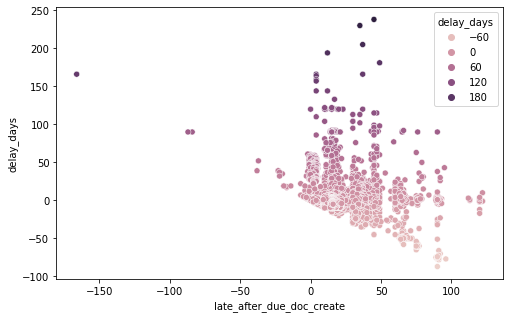

In [404]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='late_after_due_doc_create', y='delay_days', data=final_train_set, hue='delay_days') 

The above scatter plot also linearly decreases with delay but between 0 and 50 the density again increases.

<AxesSubplot:xlabel='late_after_due_baseline', ylabel='delay_days'>

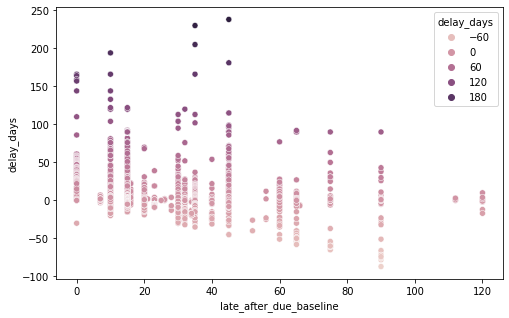

In [405]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='late_after_due_baseline', y='delay_days', data=final_train_set, hue='delay_days') 

The above scatter plot also deccreases with delay and the density is quite scattered.

<AxesSubplot:xlabel='late_after_due_posting', ylabel='delay_days'>

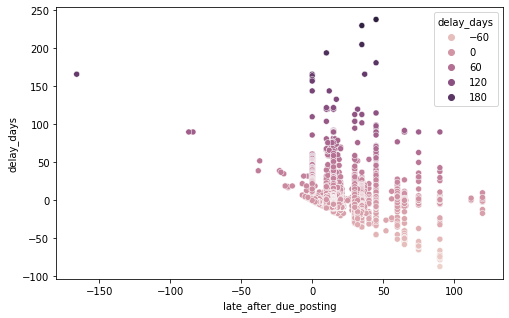

In [406]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='late_after_due_posting', y='delay_days', data=final_train_set, hue='delay_days') 

The above scatter plot also linearly decreases with delay but between 0 and 50 the density again increases.

<AxesSubplot:xlabel='cust_payment_terms', ylabel='delay_days'>

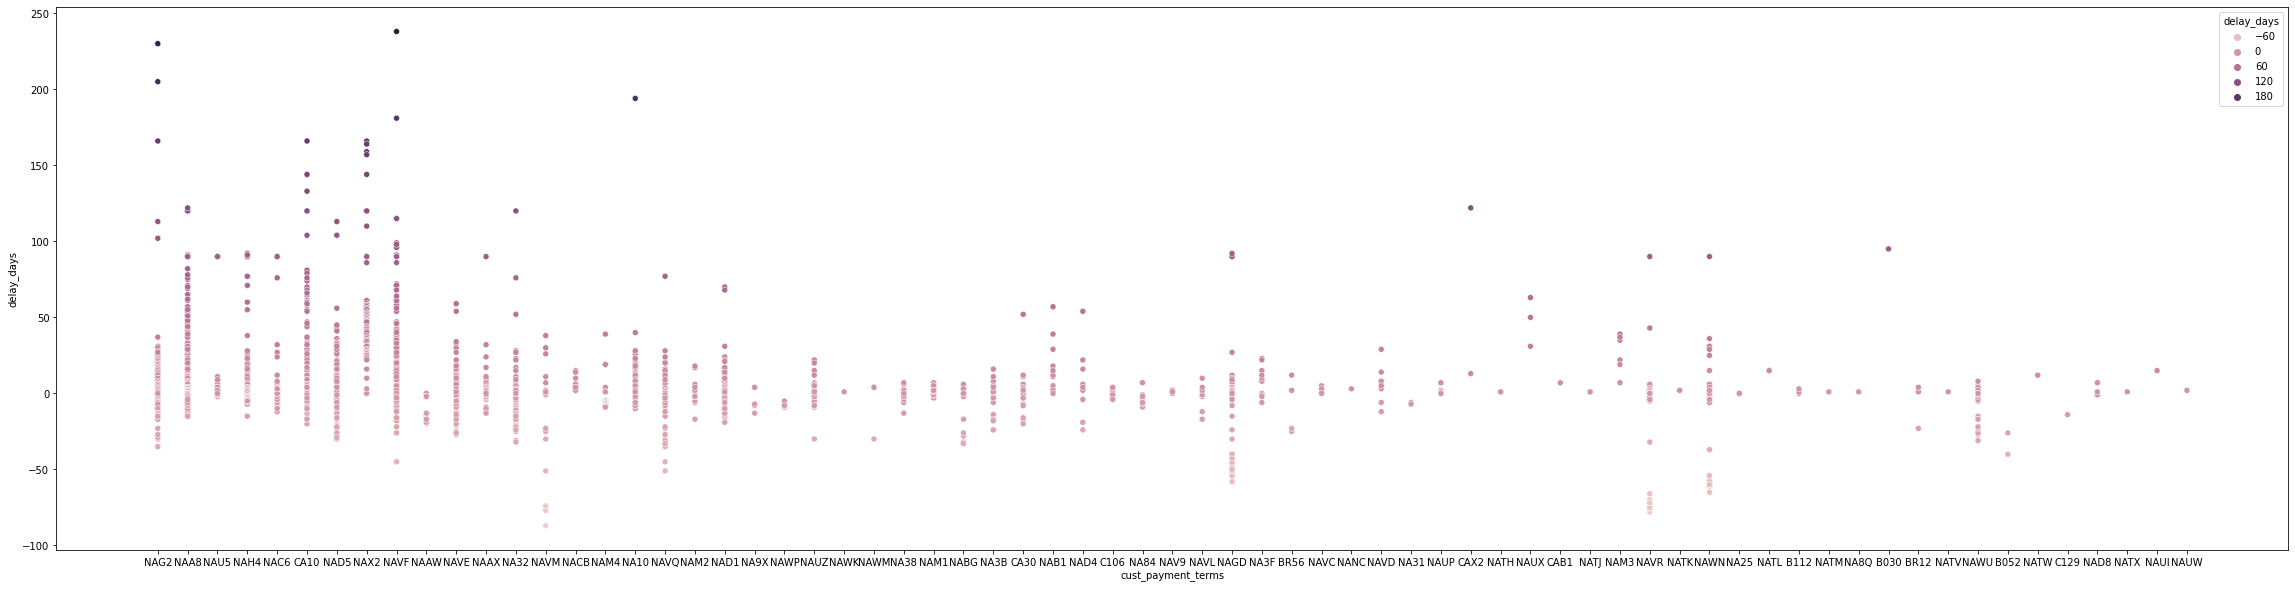

In [407]:
plt.figure(figsize=(40,10))
sns.scatterplot(x='cust_payment_terms', y='delay_days', data=final_train_set, hue='delay_days') 

The above scatter plot also deccreases with delay and the density is quite scattered but shows decreament.

<AxesSubplot:xlabel='due_in_date', ylabel='delay_days'>

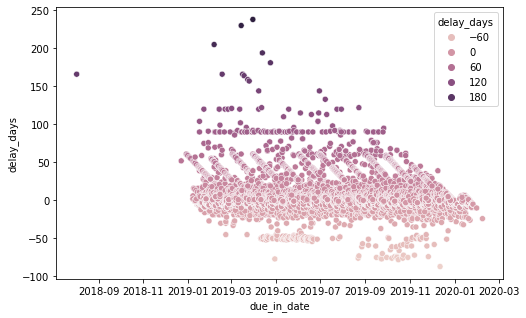

In [408]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='due_in_date', y='delay_days', data=final_train_set, hue='delay_days') 

The above scatter plot shows decreament with time but is not very clear.

<AxesSubplot:xlabel='total_open_amount', ylabel='delay_days'>

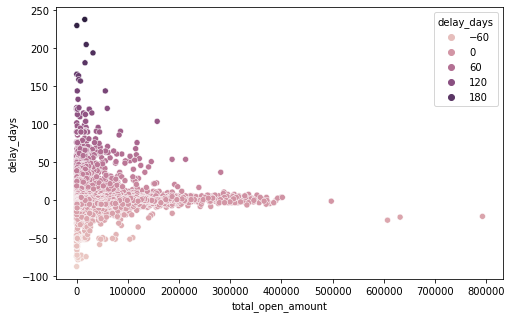

In [409]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='total_open_amount', y='delay_days', data=final_train_set, hue='delay_days') 

<AxesSubplot:xlabel='baseline_create_date', ylabel='delay_days'>

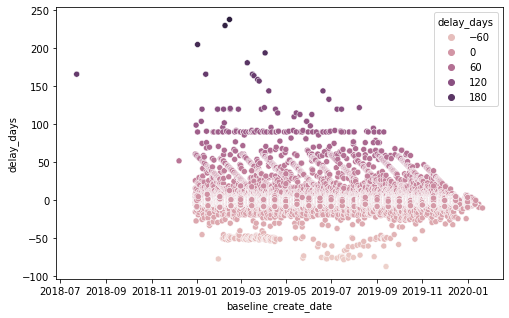

In [412]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='baseline_create_date', y='delay_days', data=final_train_set, hue='delay_days') 

# Feature Engineering

In [414]:
# Needs to be encoded
# 3   business_code                    object        
# 9   cust_number                      object        
# 7   clear_date                       datetime64[ns]
# 5   posting_date                     datetime64[ns]
# 6   due_in_date                      datetime64[ns]
# 2   invoice_currency                 object  
# 8   baseline_create_date             datetime64[ns]
# 1   cust_payment_terms               object
# 4   unique_id                        object

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   34763 non-null  object        
 1   cust_number                     34763 non-null  object        
 2   buisness_year                   34763 non-null  float64       
 3   doc_id                          34763 non-null  float64       
 4   posting_date                    34763 non-null  datetime64[ns]
 5   due_in_date                     34763 non-null  datetime64[ns]
 6   invoice_currency                34763 non-null  object        
 7   total_open_amount               34763 non-null  float64       
 8   baseline_create_date            34763 non-null  datetime64[ns]
 9   clear_date                      34763 non-null  datetime64[ns]
 10  cust_payment_terms              34763 non-null  object        
 11

When there is more unique values the kind of encoding we should prefer is mostly Label Encoding because it doesn't increase the number of features too much.But we have to check whether there is any pattern or not than only we should encode.

#### cust_payment_terms

In [415]:
X_train['encoded_cust_payment_terms']= preprocessing.LabelEncoder().fit_transform(X_train['cust_payment_terms'])
X_val['encoded_cust_payment_terms']= preprocessing.LabelEncoder().fit_transform(X_val['cust_payment_terms'])
X_test['encoded_cust_payment_terms']= preprocessing.LabelEncoder().fit_transform(X_test['cust_payment_terms'])

print(X_train['encoded_cust_payment_terms'])
print("-"*70)
print(X_train['cust_payment_terms'])
print("-"*70)
print(X_train['encoded_cust_payment_terms'].nunique(),X_train['cust_payment_terms'].nunique())
print(X_val['encoded_cust_payment_terms'].nunique(),X_val['cust_payment_terms'].nunique())
print(X_test['encoded_cust_payment_terms'].nunique(),X_test['cust_payment_terms'].nunique())
X_train.drop('cust_payment_terms', axis=1, inplace=True)
X_val.drop('cust_payment_terms', axis=1, inplace=True)
X_test.drop('cust_payment_terms', axis=1, inplace=True)
print("-"*70)
print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

12931    32
22345    21
13849    21
275      21
11611    21
         ..
12055    34
45564    50
25204    36
13722    38
29015     7
Name: encoded_cust_payment_terms, Length: 34763, dtype: int32
----------------------------------------------------------------------
12931    NAG2
22345    NAA8
13849    NAA8
275      NAA8
11611    NAA8
         ... 
12055    NAH4
45564    NAUP
25204    NAM2
13722    NAM4
29015    CA10
Name: cust_payment_terms, Length: 34763, dtype: object
----------------------------------------------------------------------
69 69
39 39
23 23
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   34763 non-null  object        
 1   cust_number                     34763 non-nu

#### invoice_currency

In [416]:
X_train['encoded_invoice_currency']= preprocessing.LabelEncoder().fit_transform(X_train['invoice_currency'])
X_val['encoded_invoice_currency']= preprocessing.LabelEncoder().fit_transform(X_val['invoice_currency'])
X_test['encoded_invoice_currency']= preprocessing.LabelEncoder().fit_transform(X_test['invoice_currency'])

print(X_train['encoded_invoice_currency'])
print(X_train['invoice_currency'])
print(X_train['encoded_invoice_currency'].nunique(),X_train['invoice_currency'].nunique())
print(X_val['encoded_invoice_currency'].nunique(),X_val['invoice_currency'].nunique())
print(X_test['encoded_invoice_currency'].nunique(),X_test['invoice_currency'].nunique())
X_train.drop('invoice_currency', axis=1, inplace=True)
X_val.drop('invoice_currency', axis=1, inplace=True)
X_test.drop('invoice_currency', axis=1, inplace=True)
print("-"*70)
print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

12931    1
22345    1
13849    1
275      1
11611    1
        ..
12055    1
45564    1
25204    1
13722    1
29015    0
Name: encoded_invoice_currency, Length: 34763, dtype: int32
12931    USD
22345    USD
13849    USD
275      USD
11611    USD
        ... 
12055    USD
45564    USD
25204    USD
13722    USD
29015    CAD
Name: invoice_currency, Length: 34763, dtype: object
2 2
2 2
2 2
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   34763 non-null  object        
 1   cust_number                     34763 non-null  object        
 2   buisness_year                   34763 non-null  float64       
 3   doc_id                          34763 non-null  float64       
 4   posting_date  

#### business_code

In [417]:
X_train['encoded_business_code']= preprocessing.LabelEncoder().fit_transform(X_train['business_code'])
X_val['encoded_business_code']= preprocessing.LabelEncoder().fit_transform(X_val['business_code'])
X_test['encoded_business_code']= preprocessing.LabelEncoder().fit_transform(X_test['business_code'])

print(X_train['encoded_business_code'])
print(X_train['business_code'])
print(X_train['encoded_business_code'].nunique(),X_train['business_code'].nunique())
print(X_val['encoded_business_code'].nunique(),X_val['business_code'].nunique())
print(X_test['encoded_business_code'].nunique(),X_test['business_code'].nunique())
X_train.drop('business_code', axis=1, inplace=True)
X_val.drop('business_code', axis=1, inplace=True)
X_test.drop('business_code', axis=1, inplace=True)
print("-"*70)
print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

12931    1
22345    1
13849    1
275      1
11611    1
        ..
12055    1
45564    5
25204    1
13722    1
29015    0
Name: encoded_business_code, Length: 34763, dtype: int32
12931    U001
22345    U001
13849    U001
275      U001
11611    U001
         ... 
12055    U001
45564    U013
25204    U001
13722    U001
29015    CA02
Name: business_code, Length: 34763, dtype: object
6 6
4 4
5 5
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cust_number                     34763 non-null  object        
 1   buisness_year                   34763 non-null  float64       
 2   doc_id                          34763 non-null  float64       
 3   posting_date                    34763 non-null  datetime64[ns]
 4   due_in_da

#### unique_id

In [418]:
X_train['encoded_unique_id']= preprocessing.LabelEncoder().fit_transform(X_train['unique_id'])
X_val['encoded_unique_id']= preprocessing.LabelEncoder().fit_transform(X_val['unique_id'])
X_test['encoded_unique_id']= preprocessing.LabelEncoder().fit_transform(X_test['unique_id'])

print(X_train['encoded_unique_id'])
print(X_train['unique_id'])
print(X_train['encoded_unique_id'].nunique(),X_train['unique_id'].nunique())
print(X_val['encoded_unique_id'].nunique(),X_val['unique_id'].nunique())
print(X_test['encoded_unique_id'].nunique(),X_test['unique_id'].nunique())
X_train.drop('unique_id', axis=1, inplace=True)
X_val.drop('unique_id', axis=1, inplace=True)
X_test.drop('unique_id', axis=1, inplace=True)
print("-"*70)
print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

12931    5177
22345    2596
13849    3333
275      2599
11611    2595
         ... 
12055    3190
45564     590
25204    2095
13722    1561
29015    1118
Name: encoded_unique_id, Length: 34763, dtype: int32
12931             CCU002_KRFT FDS llc
22345    0200726979_BJ'S  corporation
13849                  0200778998_CE 
275              0200726979_BJ'S  llc
11611           0200726979_BJ'S  corp
                     ...             
12055         0200769623_WAL-MAR corp
45564           0100046464_AL MAJ llc
25204              0200592182_DECA co
13722              0200230690_DECA in
29015          0140105847_GORDON F in
Name: unique_id, Length: 34763, dtype: object
5192 5192
1456 1456
184 184
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          ------------

#### posting_date

In [419]:
X_train['encoded_posting_day']=pd.to_datetime(X_train.posting_date).dt.day
X_val['encoded_posting_day']=pd.to_datetime(X_val.posting_date).dt.day
X_test['encoded_posting_day']=pd.to_datetime(X_test.posting_date).dt.day

X_train['encoded_posting_month']=pd.to_datetime(X_train.posting_date).dt.month
X_val['encoded_posting_month']=pd.to_datetime(X_val.posting_date).dt.month
X_test['encoded_posting_month']=pd.to_datetime(X_test.posting_date).dt.month

X_train['encoded_posting_year']=pd.to_datetime(X_train.posting_date).dt.year
X_val['encoded_posting_year']=pd.to_datetime(X_val.posting_date).dt.year
X_test['encoded_posting_year']=pd.to_datetime(X_test.posting_date).dt.year

X_train.drop('posting_date', axis=1, inplace=True)
X_val.drop('posting_date', axis=1, inplace=True)
X_test.drop('posting_date', axis=1, inplace=True)

print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cust_number                     34763 non-null  object        
 1   buisness_year                   34763 non-null  float64       
 2   doc_id                          34763 non-null  float64       
 3   due_in_date                     34763 non-null  datetime64[ns]
 4   total_open_amount               34763 non-null  float64       
 5   baseline_create_date            34763 non-null  datetime64[ns]
 6   clear_date                      34763 non-null  datetime64[ns]
 7   invoice_id                      34763 non-null  float64       
 8   late_after_due_posting          34763 non-null  int64         
 9   late_after_due_baseline         34763 non-null  int64         
 10  late_after_due_doc_create       34763 non-null  int64         
 11

#### due_in_date

In [420]:
X_train['encoded_due_in_day']=pd.to_datetime(X_train.due_in_date).dt.day
X_val['encoded_due_in_day']=pd.to_datetime(X_val.due_in_date).dt.day
X_test['encoded_due_in_day']=pd.to_datetime(X_test.due_in_date).dt.day

X_train['encoded_due_in_month']=pd.to_datetime(X_train.due_in_date).dt.month
X_val['encoded_due_in_month']=pd.to_datetime(X_val.due_in_date).dt.month
X_test['encoded_due_in_month']=pd.to_datetime(X_test.due_in_date).dt.month

X_train['encoded_due_in_year']=pd.to_datetime(X_train.due_in_date).dt.year
X_val['encoded_due_in_year']=pd.to_datetime(X_val.due_in_date).dt.year
X_test['encoded_due_in_year']=pd.to_datetime(X_test.due_in_date).dt.year

X_train.drop('due_in_date', axis=1, inplace=True)
X_val.drop('due_in_date', axis=1, inplace=True)
X_test.drop('due_in_date', axis=1, inplace=True)

print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cust_number                     34763 non-null  object        
 1   buisness_year                   34763 non-null  float64       
 2   doc_id                          34763 non-null  float64       
 3   total_open_amount               34763 non-null  float64       
 4   baseline_create_date            34763 non-null  datetime64[ns]
 5   clear_date                      34763 non-null  datetime64[ns]
 6   invoice_id                      34763 non-null  float64       
 7   late_after_due_posting          34763 non-null  int64         
 8   late_after_due_baseline         34763 non-null  int64         
 9   late_after_due_doc_create       34763 non-null  int64         
 10  late_after_posting_baseline     34763 non-null  int64         
 11

#### clear_date

In [421]:
X_train['encoded_clear_day']=pd.to_datetime(X_train.clear_date).dt.day
X_val['encoded_clear_day']=pd.to_datetime(X_val.clear_date).dt.day
X_test['encoded_clear_day']=pd.to_datetime(X_test.clear_date).dt.day

X_train['encoded_clear_month']=pd.to_datetime(X_train.clear_date).dt.month
X_val['encoded_clear_month']=pd.to_datetime(X_val.clear_date).dt.month
X_test['encoded_clear_month']=pd.to_datetime(X_test.clear_date).dt.month

X_train['encoded_clear_year']=pd.to_datetime(X_train.clear_date).dt.year
X_val['encoded_clear_year']=pd.to_datetime(X_val.clear_date).dt.year
X_test['encoded_clear_year']=pd.to_datetime(X_test.clear_date).dt.year

X_train.drop('clear_date', axis=1, inplace=True)
X_val.drop('clear_date', axis=1, inplace=True)
X_test.drop('clear_date', axis=1, inplace=True)

print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cust_number                     34763 non-null  object        
 1   buisness_year                   34763 non-null  float64       
 2   doc_id                          34763 non-null  float64       
 3   total_open_amount               34763 non-null  float64       
 4   baseline_create_date            34763 non-null  datetime64[ns]
 5   invoice_id                      34763 non-null  float64       
 6   late_after_due_posting          34763 non-null  int64         
 7   late_after_due_baseline         34763 non-null  int64         
 8   late_after_due_doc_create       34763 non-null  int64         
 9   late_after_posting_baseline     34763 non-null  int64         
 10  late_after_posting_doc_create   34763 non-null  int64         
 11

#### baseline_create_date

In [422]:
X_train['encoded_baseline_create_day']=pd.to_datetime(X_train.baseline_create_date).dt.day
X_val['encoded_baseline_create_day']=pd.to_datetime(X_val.baseline_create_date).dt.day
X_test['encoded_baseline_create_day']=pd.to_datetime(X_test.baseline_create_date).dt.day

X_train['encoded_baseline_create_month']=pd.to_datetime(X_train.baseline_create_date).dt.month
X_val['encoded_baseline_create_month']=pd.to_datetime(X_val.baseline_create_date).dt.month
X_test['encoded_baseline_create_month']=pd.to_datetime(X_test.baseline_create_date).dt.month

X_train['encoded_baseline_create_year']=pd.to_datetime(X_train.baseline_create_date).dt.year
X_val['encoded_baseline_create_year']=pd.to_datetime(X_val.baseline_create_date).dt.year
X_test['encoded_baseline_create_year']=pd.to_datetime(X_test.baseline_create_date).dt.year

X_train.drop('baseline_create_date', axis=1, inplace=True)
X_val.drop('baseline_create_date', axis=1, inplace=True)
X_test.drop('baseline_create_date', axis=1, inplace=True)

print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_number                     34763 non-null  object 
 1   buisness_year                   34763 non-null  float64
 2   doc_id                          34763 non-null  float64
 3   total_open_amount               34763 non-null  float64
 4   invoice_id                      34763 non-null  float64
 5   late_after_due_posting          34763 non-null  int64  
 6   late_after_due_baseline         34763 non-null  int64  
 7   late_after_due_doc_create       34763 non-null  int64  
 8   late_after_posting_baseline     34763 non-null  int64  
 9   late_after_posting_doc_create   34763 non-null  int64  
 10  late_after_baseline_doc_create  34763 non-null  int64  
 11  encoded_cust_payment_terms      34763 non-null  int32  
 12  encoded_invoice_currency    

#### cust_number

In [423]:
X_train['encoded_cust_number']= preprocessing.LabelEncoder().fit_transform(X_train['cust_number'])
X_val['encoded_cust_number']= preprocessing.LabelEncoder().fit_transform(X_val['cust_number'])
X_test['encoded_cust_number']= preprocessing.LabelEncoder().fit_transform(X_test['cust_number'])

print(X_train['encoded_cust_number'])
print("-"*70)
print(X_train['cust_number'])
print("-"*70)
print(X_train['encoded_cust_number'].nunique(),X_train['cust_number'].nunique())
print(X_val['encoded_cust_number'].nunique(),X_val['cust_number'].nunique())
print(X_test['encoded_cust_number'].nunique(),X_test['cust_number'].nunique())
X_train.drop('cust_number', axis=1, inplace=True)
X_val.drop('cust_number', axis=1, inplace=True)
X_test.drop('cust_number', axis=1, inplace=True)
print("-"*70)
print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

12931    1271
22345     679
13849     796
275       679
11611     679
         ... 
12055     780
45564     191
25204     585
13722     462
29015     347
Name: encoded_cust_number, Length: 34763, dtype: int32
----------------------------------------------------------------------
12931        CCU002
22345    0200726979
13849    0200778998
275      0200726979
11611    0200726979
            ...    
12055    0200769623
45564    0100046464
25204    0200592182
13722    0200230690
29015    0140105847
Name: cust_number, Length: 34763, dtype: object
----------------------------------------------------------------------
1273 1273
447 447
88 88
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   buisness_year                   34763 non-null

# Using these extracted feature from different dates to create new features as in the next feature seletion step I find them having less correlation with eachother.

late_after_due_posting       

late_after_posting_baseline     

late_after_posting_doc_create

late_after_baseline_doc_create  

In [424]:
X_train['late_after_due_posting_per_amount'] = X_train['late_after_due_posting']/X_train['total_open_amount']
print(X_train.shape)
print(X_train.info())
X_val['late_after_due_posting_per_amount'] = X_val['late_after_due_posting']/X_val['total_open_amount']
print(X_val.shape)
X_test['late_after_due_posting_per_amount'] = X_test['late_after_due_posting']/X_test['total_open_amount']
print(X_test.shape)

(34763, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   buisness_year                      34763 non-null  float64
 1   doc_id                             34763 non-null  float64
 2   total_open_amount                  34763 non-null  float64
 3   invoice_id                         34763 non-null  float64
 4   late_after_due_posting             34763 non-null  int64  
 5   late_after_due_baseline            34763 non-null  int64  
 6   late_after_due_doc_create          34763 non-null  int64  
 7   late_after_posting_baseline        34763 non-null  int64  
 8   late_after_posting_doc_create      34763 non-null  int64  
 9   late_after_baseline_doc_create     34763 non-null  int64  
 10  encoded_cust_payment_terms         34763 non-null  int32  
 11  encoded_invoice_currency           347

In [425]:
X_train['late_after_posting_baseline_per_amount'] = X_train['late_after_posting_baseline']/X_train['total_open_amount']
print(X_train.shape)
print(X_train.info())
X_val['late_after_posting_baseline_per_amount'] = X_val['late_after_posting_baseline']/X_val['total_open_amount']
print(X_val.shape)
X_test['late_after_posting_baseline_per_amount'] = X_test['late_after_posting_baseline']/X_test['total_open_amount']
print(X_test.shape)

(34763, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   buisness_year                           34763 non-null  float64
 1   doc_id                                  34763 non-null  float64
 2   total_open_amount                       34763 non-null  float64
 3   invoice_id                              34763 non-null  float64
 4   late_after_due_posting                  34763 non-null  int64  
 5   late_after_due_baseline                 34763 non-null  int64  
 6   late_after_due_doc_create               34763 non-null  int64  
 7   late_after_posting_baseline             34763 non-null  int64  
 8   late_after_posting_doc_create           34763 non-null  int64  
 9   late_after_baseline_doc_create          34763 non-null  int64  
 10  encoded_cust_payment_terms              34

In [426]:
X_train['late_after_posting_doc_create_per_amount'] = X_train['late_after_posting_doc_create']/X_train['total_open_amount']
print(X_train.shape)
print(X_train.info())
X_val['late_after_posting_doc_create_per_amount'] = X_val['late_after_posting_doc_create']/X_val['total_open_amount']
print(X_val.shape)
X_test['late_after_posting_doc_create_per_amount'] = X_test['late_after_posting_doc_create']/X_test['total_open_amount']
print(X_test.shape)

(34763, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   buisness_year                             34763 non-null  float64
 1   doc_id                                    34763 non-null  float64
 2   total_open_amount                         34763 non-null  float64
 3   invoice_id                                34763 non-null  float64
 4   late_after_due_posting                    34763 non-null  int64  
 5   late_after_due_baseline                   34763 non-null  int64  
 6   late_after_due_doc_create                 34763 non-null  int64  
 7   late_after_posting_baseline               34763 non-null  int64  
 8   late_after_posting_doc_create             34763 non-null  int64  
 9   late_after_baseline_doc_create            34763 non-null  int64  
 10  encoded_cust_payme

In [427]:
X_train['late_after_baseline_doc_create_per_amount'] = X_train['late_after_baseline_doc_create']/X_train['total_open_amount']
print(X_train.shape)
print(X_train.info())
X_val['late_after_baseline_doc_create_per_amount'] = X_val['late_after_baseline_doc_create']/X_val['total_open_amount']
print(X_val.shape)
X_test['late_after_baseline_doc_create_per_amount'] = X_test['late_after_baseline_doc_create']/X_test['total_open_amount']
print(X_test.shape)

(34763, 31)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   buisness_year                              34763 non-null  float64
 1   doc_id                                     34763 non-null  float64
 2   total_open_amount                          34763 non-null  float64
 3   invoice_id                                 34763 non-null  float64
 4   late_after_due_posting                     34763 non-null  int64  
 5   late_after_due_baseline                    34763 non-null  int64  
 6   late_after_due_doc_create                  34763 non-null  int64  
 7   late_after_posting_baseline                34763 non-null  int64  
 8   late_after_posting_doc_create              34763 non-null  int64  
 9   late_after_baseline_doc_create             34763 non-null  int64  
 10  encode

#### buisness_year, doc_id, total_open_amount, invoice_id

In [428]:
X_train.buisness_year = X_train.buisness_year.astype(int)
X_train.doc_id = X_train.doc_id.astype(int)
X_train.total_open_amount = X_train.total_open_amount.astype(int)
X_train.invoice_id = X_train.invoice_id.astype(int)

X_val.buisness_year = X_val.buisness_year.astype(int)
X_val.doc_id = X_val.doc_id.astype(int)
X_val.total_open_amount = X_val.total_open_amount.astype(int)
X_val.invoice_id = X_val.invoice_id.astype(int)

X_test.buisness_year = X_test.buisness_year.astype(int)
X_test.doc_id = X_test.doc_id.astype(int)
X_test.total_open_amount = X_test.total_open_amount.astype(int)
X_test.invoice_id = X_test.invoice_id.astype(int)

X_train.late_after_due_posting_per_amount = X_train.late_after_due_posting_per_amount.astype(int)
X_train.late_after_posting_baseline_per_amount = X_train.late_after_posting_baseline_per_amount.astype(int)
X_train.late_after_posting_doc_create_per_amount = X_train.late_after_posting_doc_create_per_amount.astype(int)
X_train.late_after_baseline_doc_create_per_amount = X_train.late_after_baseline_doc_create_per_amount.astype(int)

X_val.late_after_due_posting_per_amount = X_val.late_after_due_posting_per_amount.astype(int)
X_val.late_after_posting_baseline_per_amount = X_val.late_after_posting_baseline_per_amount.astype(int)
X_val.late_after_posting_doc_create_per_amount = X_val.late_after_posting_doc_create_per_amount.astype(int)
X_val.late_after_baseline_doc_create_per_amount = X_val.late_after_baseline_doc_create_per_amount.astype(int)

X_test.late_after_due_posting_per_amount = X_test.late_after_due_posting_per_amount.astype(int)
X_test.late_after_posting_baseline_per_amount = X_test.late_after_posting_baseline_per_amount.astype(int)
X_test.late_after_posting_doc_create_per_amount = X_test.late_after_posting_doc_create_per_amount.astype(int)
X_test.late_after_baseline_doc_create_per_amount = X_test.late_after_baseline_doc_create_per_amount.astype(int)
print(X_train.info())
print("-"*70)
print(X_val.info())
print("-"*70)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   buisness_year                              34763 non-null  int32
 1   doc_id                                     34763 non-null  int32
 2   total_open_amount                          34763 non-null  int32
 3   invoice_id                                 34763 non-null  int32
 4   late_after_due_posting                     34763 non-null  int64
 5   late_after_due_baseline                    34763 non-null  int64
 6   late_after_due_doc_create                  34763 non-null  int64
 7   late_after_posting_baseline                34763 non-null  int64
 8   late_after_posting_doc_create              34763 non-null  int64
 9   late_after_baseline_doc_create             34763 non-null  int64
 10  encoded_cust_payment_terms                

# Feature Selection

Using the Correlation matrix for selection of useful features

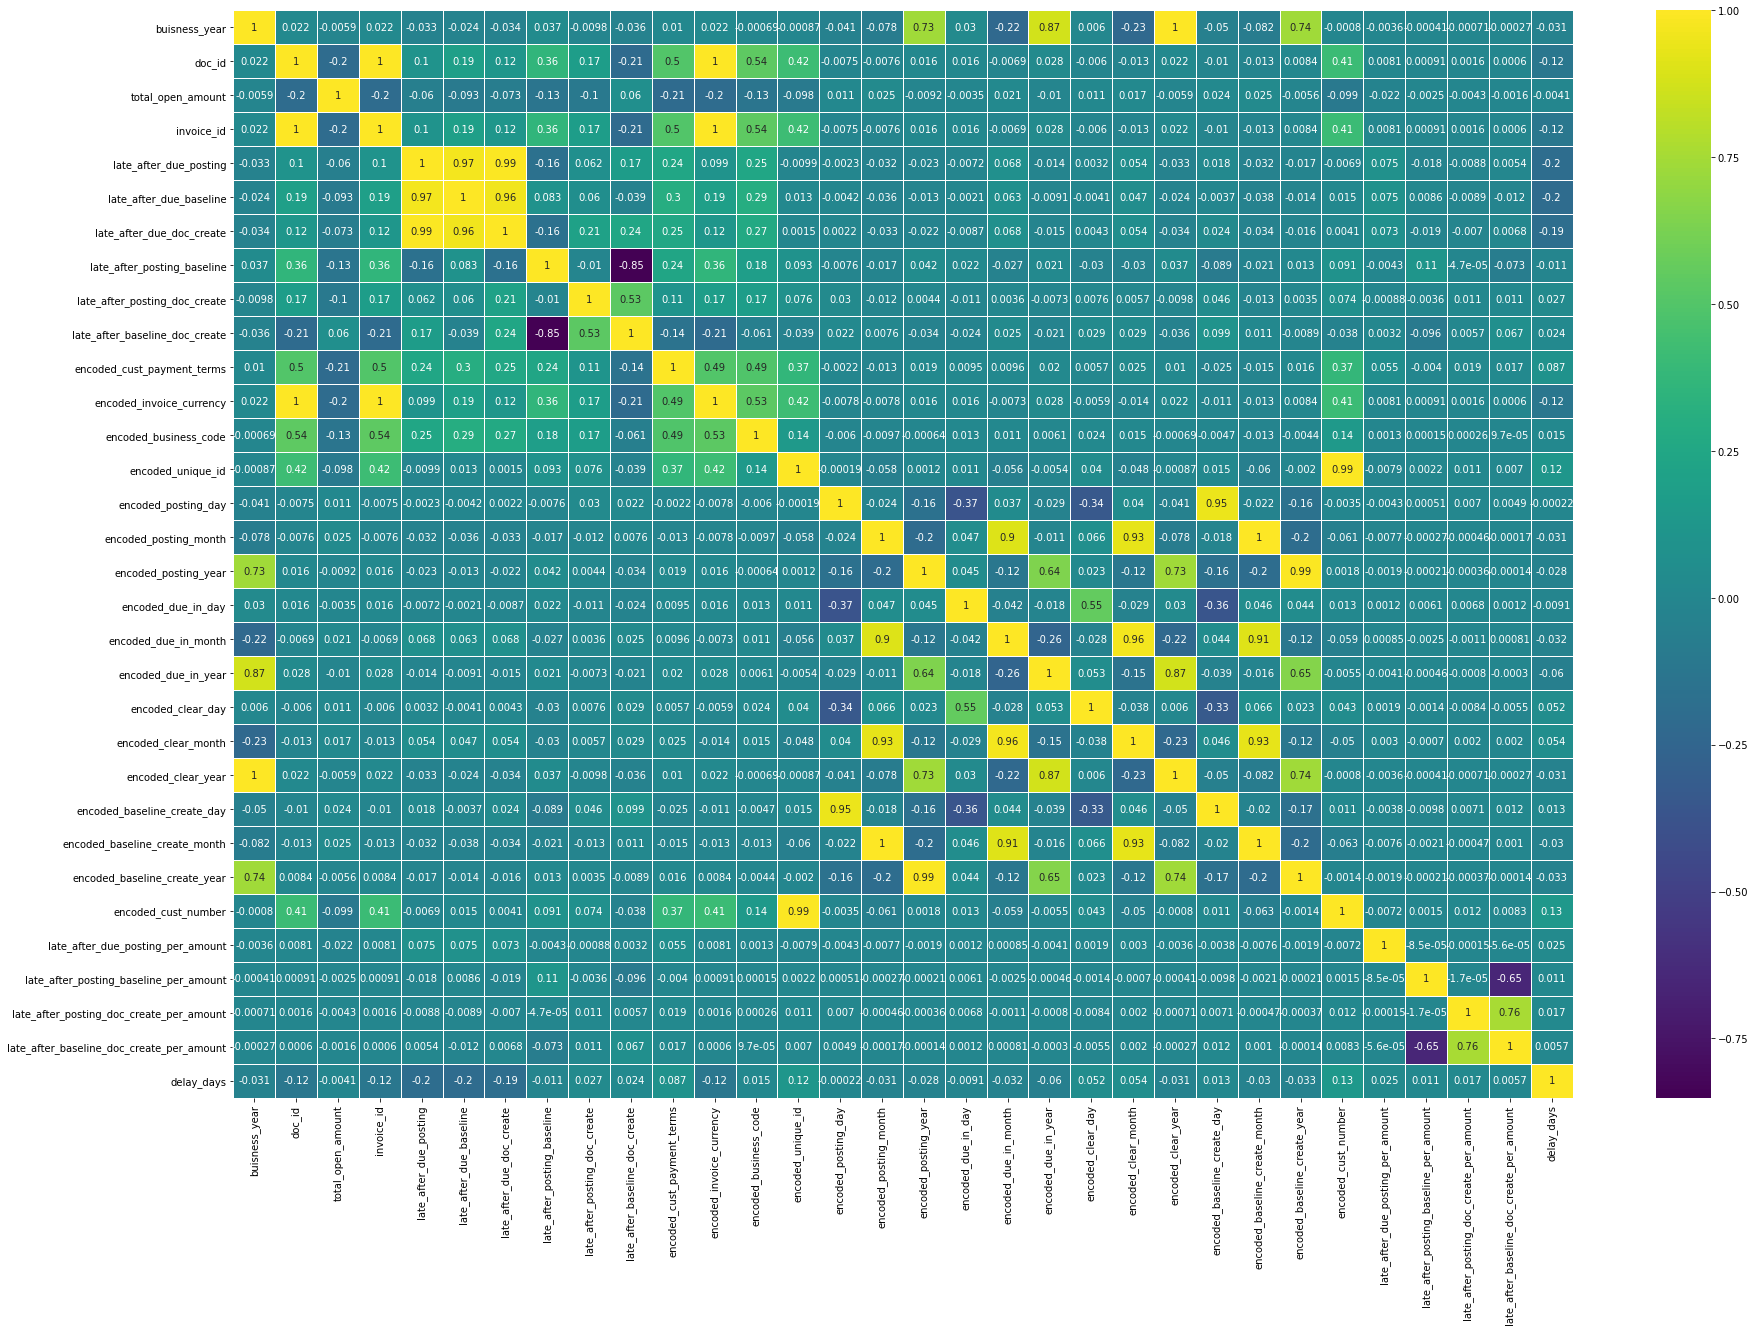

In [429]:
final_train_set=X_train.join(y_train)
cormat=final_train_set.corr()
plt.figure(figsize=(30,20))
g= sns.heatmap(cormat,annot=True,cmap='viridis',linewidths=.5)

### Dropping all columns related to Clear_date as in final test data frame no such column will be available

In [430]:
X_train.drop(['encoded_clear_year','encoded_clear_month','encoded_clear_day'], axis=1, inplace=True)
X_val.drop(['encoded_clear_year','encoded_clear_month','encoded_clear_day'], axis=1, inplace=True)
X_test.drop(['encoded_clear_year','encoded_clear_month','encoded_clear_day'], axis=1, inplace=True)

X_train.info(),X_val.info(),X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   buisness_year                              34763 non-null  int32
 1   doc_id                                     34763 non-null  int32
 2   total_open_amount                          34763 non-null  int32
 3   invoice_id                                 34763 non-null  int32
 4   late_after_due_posting                     34763 non-null  int64
 5   late_after_due_baseline                    34763 non-null  int64
 6   late_after_due_doc_create                  34763 non-null  int64
 7   late_after_posting_baseline                34763 non-null  int64
 8   late_after_posting_doc_create              34763 non-null  int64
 9   late_after_baseline_doc_create             34763 non-null  int64
 10  encoded_cust_payment_terms                

(None, None, None)

#### Dropping all features which have a correlation greater than 0.9

In [431]:
X_train.info(),X_val.info(),X_test.info()

correlated_features = set()
correlation_matrix=X_train.corr().abs()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.96:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("-"*50)   
len(correlated_features)
print(correlated_features)
print("-"*50)

X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_val.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

X_train.info(),X_val.info(),X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34763 entries, 12931 to 29015
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   buisness_year                              34763 non-null  int32
 1   doc_id                                     34763 non-null  int32
 2   total_open_amount                          34763 non-null  int32
 3   invoice_id                                 34763 non-null  int32
 4   late_after_due_posting                     34763 non-null  int64
 5   late_after_due_baseline                    34763 non-null  int64
 6   late_after_due_doc_create                  34763 non-null  int64
 7   late_after_posting_baseline                34763 non-null  int64
 8   late_after_posting_doc_create              34763 non-null  int64
 9   late_after_baseline_doc_create             34763 non-null  int64
 10  encoded_cust_payment_terms                

(None, None, None)

#### Using Random Forest Regressor

In [432]:
import math
# Fitting Random Forest Regressor Tree to the Training Set
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train) 
# Predicting the Test Set Results
y_predict0 = RFregressor.predict(X_val)
print("RMSE of X_val for XGBoost Regressor : ",math.sqrt(mean_squared_error(y_val, y_predict0)))
print("MAE of X_val for XGBoost Regressor : ",mean_absolute_error(y_val, y_predict0))
print("R2 Score of X_val for XGBoost Regressor : ",r2_score(y_val, y_predict0))

RMSE of X_val for XGBoost Regressor :  9.04187849794163
MAE of X_val for XGBoost Regressor :  4.7930711519845115
R2 Score of X_val for XGBoost Regressor :  -0.0954311434693722


#### Using XGBoost Regressor

In [433]:
# Fitting XGBoost Regressor to the Training Set
xgbregressor = xgb.XGBRegressor()
xgbregressor.fit(X_train, y_train) 
# Predicting the Validation Set Results
y_predict2 = xgbregressor.predict(X_val)
print("RMSE of X_val for XGBoost Regressor : ",math.sqrt(mean_squared_error(y_val, y_predict2)))
print("MAE of X_val for XGBoost Regressor : ",mean_absolute_error(y_val, y_predict2))
print("R2 Score of X_val for XGBoost Regressor : ",r2_score(y_val, y_predict2))

RMSE of X_val for XGBoost Regressor :  9.112432040595541
MAE of X_val for XGBoost Regressor :  5.0507806077958355
R2 Score of X_val for XGBoost Regressor :  -0.11259308175111848


#### Final model using Random Forest Regressor for prediction on X_test

In [434]:
y_predict_test =xgbregressor.predict(X_test)
print("RMSE of X_test on for XGBoost Regressor : ",math.sqrt(mean_squared_error(y_test, y_predict_test)))
print("MAE of X_val for XGBoost Regressor : ",mean_absolute_error(y_test, y_predict_test))
print("R2 Score of X_test on XGBoost Regressor : ",r2_score(y_test, y_predict_test))

RMSE of X_test on for XGBoost Regressor :  33.78468187519053
MAE of X_val for XGBoost Regressor :  26.603804731475456
R2 Score of X_test on XGBoost Regressor :  -0.7952331837040301


# Mega Test

In [435]:
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200726979,BJ'S foundation,NaN,2020.0,1.930875e+09,2020-05-06,20200507,20200506,20200521.0,USD,RV,1.0,NaN,1072.61,20200506.0,NAA8,1.930875e+09,1
11,U001,0200726979,BJ'S foundation,NaN,2020.0,1.930629e+09,2020-03-08,20200310,20200308,20200323.0,USD,RV,1.0,NaN,501.86,20200308.0,NAA8,1.930629e+09,1
14,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930848e+09,2020-05-01,20200501,20200501,20200516.0,USD,RV,1.0,NaN,52356.47,20200501.0,NAH4,1.930848e+09,1
15,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930688e+09,2020-03-21,20200323,20200321,20200405.0,USD,RV,1.0,NaN,52967.56,20200321.0,NAH4,1.930688e+09,1
16,CA02,0140105847,GORDON F corp,NaN,2020.0,2.960626e+09,2020-04-03,20200403,20200403,20200417.0,CAD,RV,1.0,NaN,4722.05,20200407.0,CA10,2.960626e+09,1


# PREPROCESSING

In [436]:
#Check the total numbers of null rows for each feature or column
print(Test.isnull().sum())
print("*"*70)
#Remove column area_business as it has all its values == null, invoice_id with nan and some not needed columns
Test.drop('area_business', axis=1, inplace=True)
Test.drop('document_create_date.1', axis=1, inplace=True)
Test.drop('clear_date', axis=1, inplace=True)
Test.dropna(subset=['invoice_id'], inplace=True)
Test.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64
**********************************************************************


business_code           0
cust_number             0
name_customer           0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
document type           0
posting_id              0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              0
isOpen                  0
dtype: int64

In [437]:
#Remove all columns which has more duplicate values or number of unique values is less than 2
Test.head()
unique_cols =  [x for x in Test.columns if Test[x].nunique()==1] 
print(unique_cols)
Test.drop(['document type', 'posting_id', 'isOpen'],axis=1,inplace=True)
print(Test.columns)
print("*"*80)
#split the columns for day, month and year for clear_date and due_date
#Change the datatype of all date columns
Test['due_in_date']=pd.to_datetime(Test['due_in_date'], format='%Y%m%d')
Test['document_create_date']=pd.to_datetime(Test['document_create_date'], format='%Y%m%d')
Test['baseline_create_date']=pd.to_datetime(Test['baseline_create_date'], format='%Y%m%d')
Test['due_in_date'] = Test['due_in_date'].dt.date

Test['posting_date']=pd.to_datetime(Test['posting_date']).dt.date
Test['baseline_create_date']=pd.to_datetime(Test['baseline_create_date']).dt.date
Test['document_create_date']=pd.to_datetime(Test['document_create_date']).dt.date
Test['late_after_due_posting'] = (Test['due_in_date'] - Test['posting_date']).dt.days
Test['late_after_due_baseline'] = (Test['due_in_date'] - Test['baseline_create_date']).dt.days
Test['late_after_due_doc_create'] = (Test['due_in_date'] - Test['document_create_date']).dt.days

Test['late_after_posting_baseline'] = (Test['posting_date'] - Test['baseline_create_date']).dt.days
Test['late_after_posting_doc_create'] = (Test['posting_date'] - Test['document_create_date']).dt.days

Test['late_after_baseline_doc_create'] = (Test['baseline_create_date'] - Test['document_create_date']).dt.days

print(Test.info())
print("*"*80)
Test.head()

['buisness_year', 'document type', 'posting_id', 'isOpen']
Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'document_create_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id'],
      dtype='object')
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   business_code                   10000 non-null  object 
 1   cust_number                     10000 non-null  object 
 2   name_customer                   10000 non-null  object 
 3   buisness_year                   10000 non-null  float64
 4   doc_id                          10000 non-null  float64
 5   posting_date                    1000

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,late_after_due_posting,late_after_due_baseline,late_after_due_doc_create,late_after_posting_baseline,late_after_posting_doc_create,late_after_baseline_doc_create
0,U001,0200726979,BJ'S foundation,2020.0,1.930875e+09,2020-05-06,2020-05-07,2020-05-21,USD,1072.61,2020-05-06,NAA8,1.930875e+09,15,15,14,0,-1,-1
11,U001,0200726979,BJ'S foundation,2020.0,1.930629e+09,2020-03-08,2020-03-10,2020-03-23,USD,501.86,2020-03-08,NAA8,1.930629e+09,15,15,13,0,-2,-2
14,U001,0200769623,WAL-MAR llc,2020.0,1.930848e+09,2020-05-01,2020-05-01,2020-05-16,USD,52356.47,2020-05-01,NAH4,1.930848e+09,15,15,15,0,0,0
15,U001,0200769623,WAL-MAR corporation,2020.0,1.930688e+09,2020-03-21,2020-03-23,2020-04-05,USD,52967.56,2020-03-21,NAH4,1.930688e+09,15,15,13,0,-2,-2
16,CA02,0140105847,GORDON F corp,2020.0,2.960626e+09,2020-04-03,2020-04-03,2020-04-17,CAD,4722.05,2020-04-07,CA10,2.960626e+09,14,10,14,-4,0,4


In [438]:
Test=Test.sort_values(by='posting_date', ascending=True)
Test['unique_id'] = Test['cust_number'].astype(str)+"_"+Test['name_customer'].astype(str)
print(Test['cust_number'].nunique())
print(Test['unique_id'].nunique())
Test.head()

653
2301


,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,late_after_due_posting,late_after_due_baseline,late_after_due_doc_create,late_after_posting_baseline,late_after_posting_doc_create,late_after_baseline_doc_create,unique_id
18706,CA02,0140104409,LOB corporation,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,CAD,171863.79,2020-02-28,CA10,2.960617e+09,11,10,11,-1,0,1,0140104409_LOB corporation
17550,U001,0200769623,WAL-MAR corporation,2020.0,1.930568e+09,2020-02-27,2020-02-26,2020-03-13,USD,30911.04,2020-02-27,NAH4,1.930568e+09,15,15,16,0,1,1,0200769623_WAL-MAR corporation
29712,U001,0200776463,KROGE us,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-03-13,USD,15393.76,2020-02-27,NAA8,1.930578e+09,15,15,15,0,0,0,0200776463_KROGE us
17663,U001,0200936373,SUPE,2020.0,1.930570e+09,2020-02-27,2020-02-26,2020-03-13,USD,7441.35,2020-02-27,NAA8,1.930570e+09,15,15,16,0,1,1,0200936373_SUPE
49758,U001,0200705742,DOT us,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-03-18,USD,53537.46,2020-02-27,NAD1,1.930576e+09,20,20,20,0,0,0,0200705742_DOT us


In [439]:
Test['due_in_date']=pd.to_datetime(Test.due_in_date)
Test['baseline_create_date']=pd.to_datetime(Test.baseline_create_date)
Test['document_create_date']=pd.to_datetime(Test.document_create_date)
Test['posting_date']=pd.to_datetime(Test.posting_date)
Test.drop(['name_customer'], axis=1, inplace=True)
print(Test.dtypes)
print("*"*80)
print(Test.info())
print(Test.shape)

business_code                             object
cust_number                               object
buisness_year                            float64
doc_id                                   float64
posting_date                      datetime64[ns]
document_create_date              datetime64[ns]
due_in_date                       datetime64[ns]
invoice_currency                          object
total_open_amount                        float64
baseline_create_date              datetime64[ns]
cust_payment_terms                        object
invoice_id                               float64
late_after_due_posting                     int64
late_after_due_baseline                    int64
late_after_due_doc_create                  int64
late_after_posting_baseline                int64
late_after_posting_doc_create              int64
late_after_baseline_doc_create             int64
unique_id                                 object
dtype: object
*******************************************************

In [440]:
print('Before Dropping : ', Test.shape)
#drop all rows with same unique_id and  invoice_id 
indexNames = Test[Test.unique_id.duplicated() & Test.invoice_id.duplicated()].index
# Delete these row indexes from dataFrame
Test.drop(indexNames , inplace=True)
Test.drop('document_create_date',axis=1,inplace=True)
print('After Dropping : ', Test.shape)
print("*"*70)
print(Test.info())
print("*"*70)
Test.head()

Before Dropping :  (10000, 19)
After Dropping :  (9712, 18)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   9712 non-null   object        
 1   cust_number                     9712 non-null   object        
 2   buisness_year                   9712 non-null   float64       
 3   doc_id                          9712 non-null   float64       
 4   posting_date                    9712 non-null   datetime64[ns]
 5   due_in_date                     9712 non-null   datetime64[ns]
 6   invoice_currency                9712 non-null   object        
 7   total_open_amount               9712 non-null   float64       
 8   baseline_create_date            9712 non-null   datetime64[ns]
 9   cust

,business_code,cust_number,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,late_after_due_posting,late_after_due_baseline,late_after_due_doc_create,late_after_posting_baseline,late_after_posting_doc_create,late_after_baseline_doc_create,unique_id
18706,CA02,0140104409,2020.0,2.960617e+09,2020-02-27,2020-03-09,CAD,171863.79,2020-02-28,CA10,2.960617e+09,11,10,11,-1,0,1,0140104409_LOB corporation
17550,U001,0200769623,2020.0,1.930568e+09,2020-02-27,2020-03-13,USD,30911.04,2020-02-27,NAH4,1.930568e+09,15,15,16,0,1,1,0200769623_WAL-MAR corporation
29712,U001,0200776463,2020.0,1.930578e+09,2020-02-27,2020-03-13,USD,15393.76,2020-02-27,NAA8,1.930578e+09,15,15,15,0,0,0,0200776463_KROGE us
17663,U001,0200936373,2020.0,1.930570e+09,2020-02-27,2020-03-13,USD,7441.35,2020-02-27,NAA8,1.930570e+09,15,15,16,0,1,1,0200936373_SUPE
49758,U001,0200705742,2020.0,1.930576e+09,2020-02-27,2020-03-18,USD,53537.46,2020-02-27,NAD1,1.930576e+09,20,20,20,0,0,0,0200705742_DOT us


# Feature Engineering

#### cust_payment_terms

In [442]:
Test['encoded_cust_payment_terms']= preprocessing.LabelEncoder().fit_transform(Test['cust_payment_terms'])

print(Test['encoded_cust_payment_terms'])
print("-"*70)
print(Test['cust_payment_terms'])
print("-"*70)
print(Test['encoded_cust_payment_terms'].nunique(),Test['cust_payment_terms'].nunique())
Test.drop('cust_payment_terms', axis=1, inplace=True)
print("-"*70)
print(Test.info())

18706     2
17550    25
29712    10
17663    10
49758    19
         ..
17613    10
48462    10
8222     10
1225     10
19646    36
Name: encoded_cust_payment_terms, Length: 9712, dtype: int32
----------------------------------------------------------------------
18706    CA10
17550    NAH4
29712    NAA8
17663    NAA8
49758    NAD1
         ... 
17613    NAA8
48462    NAA8
8222     NAA8
1225     NAA8
19646    NAVE
Name: cust_payment_terms, Length: 9712, dtype: object
----------------------------------------------------------------------
41 41
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   9712 non-null   object        
 1   cust_number                     9712 non-null   object     

#### invoice_currency

In [443]:
Test['encoded_invoice_currency']= preprocessing.LabelEncoder().fit_transform(Test['invoice_currency'])

print(Test['encoded_invoice_currency'])
print(Test['invoice_currency'])
print(Test['encoded_invoice_currency'].nunique(),Test['invoice_currency'].nunique())
Test.drop('invoice_currency', axis=1, inplace=True)
print("-"*70)
print(Test.info())

18706    0
17550    1
29712    1
17663    1
49758    1
        ..
17613    1
48462    1
8222     1
1225     1
19646    1
Name: encoded_invoice_currency, Length: 9712, dtype: int32
18706    CAD
17550    USD
29712    USD
17663    USD
49758    USD
        ... 
17613    USD
48462    USD
8222     USD
1225     USD
19646    USD
Name: invoice_currency, Length: 9712, dtype: object
2 2
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   9712 non-null   object        
 1   cust_number                     9712 non-null   object        
 2   buisness_year                   9712 non-null   float64       
 3   doc_id                          9712 non-null   float64       
 4   posting_date             

#### business_code

In [444]:
Test['encoded_business_code']= preprocessing.LabelEncoder().fit_transform(Test['business_code'])

print(Test['encoded_business_code'])
print(Test['business_code'])
print(Test['encoded_business_code'].nunique(),Test['business_code'].nunique())
Test.drop('business_code', axis=1, inplace=True)
print("-"*70)
print(Test.info())

18706    0
17550    1
29712    1
17663    1
49758    1
        ..
17613    1
48462    1
8222     1
1225     1
19646    4
Name: encoded_business_code, Length: 9712, dtype: int32
18706    CA02
17550    U001
29712    U001
17663    U001
49758    U001
         ... 
17613    U001
48462    U001
8222     U001
1225     U001
19646    U013
Name: business_code, Length: 9712, dtype: object
5 5
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cust_number                     9712 non-null   object        
 1   buisness_year                   9712 non-null   float64       
 2   doc_id                          9712 non-null   float64       
 3   posting_date                    9712 non-null   datetime64[ns]
 4   due_in_date         

#### unique_id

In [445]:
Test['encoded_unique_id']= preprocessing.LabelEncoder().fit_transform(Test['unique_id'])

print(Test['encoded_unique_id'])
print(Test['unique_id'])
print(Test['encoded_unique_id'].nunique(),Test['unique_id'].nunique())
Test.drop('unique_id', axis=1, inplace=True)
print("-"*70)
print(Test.info())

18706     294
17550    1389
29712    1457
17663    1850
49758     894
         ... 
17613    1344
48462    1830
8222     1831
1225     1826
19646     126
Name: encoded_unique_id, Length: 9712, dtype: int32
18706        0140104409_LOB corporation
17550    0200769623_WAL-MAR corporation
29712               0200776463_KROGE us
17663                  0200936373_SUPE 
49758                 0200705742_DOT us
                      ...              
17613              0200763229_MAINES us
48462       0200915438_GROC corporation
8222         0200915438_GROC foundation
1225                   0200915438_GROC 
19646             0100034330_MASSY D co
Name: unique_id, Length: 9712, dtype: object
2301 2301
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          -----------

#### posting_date

In [446]:
Test['encoded_posting_day']=pd.to_datetime(Test.posting_date).dt.day
Test['encoded_posting_month']=pd.to_datetime(Test.posting_date).dt.month
Test['encoded_posting_year']=pd.to_datetime(Test.posting_date).dt.year

Test.drop('posting_date', axis=1, inplace=True)
print(Test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cust_number                     9712 non-null   object        
 1   buisness_year                   9712 non-null   float64       
 2   doc_id                          9712 non-null   float64       
 3   due_in_date                     9712 non-null   datetime64[ns]
 4   total_open_amount               9712 non-null   float64       
 5   baseline_create_date            9712 non-null   datetime64[ns]
 6   invoice_id                      9712 non-null   float64       
 7   late_after_due_posting          9712 non-null   int64         
 8   late_after_due_baseline         9712 non-null   int64         
 9   late_after_due_doc_create       9712 non-null   int64         
 10  late_after_posting_baseline     9712 non-null   int64         
 11 

#### due_in_date

In [447]:
Test['encoded_due_in_day']=pd.to_datetime(Test.due_in_date).dt.day
Test['encoded_due_in_month']=pd.to_datetime(Test.due_in_date).dt.month
Test['encoded_due_in_year']=pd.to_datetime(Test.due_in_date).dt.year

data = [Test['due_in_date']]
headers = ["due_in_date"]
Test_new = pd.concat(data, axis=1, keys=headers)
Test.drop('due_in_date', axis=1, inplace=True)
print(Test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cust_number                     9712 non-null   object        
 1   buisness_year                   9712 non-null   float64       
 2   doc_id                          9712 non-null   float64       
 3   total_open_amount               9712 non-null   float64       
 4   baseline_create_date            9712 non-null   datetime64[ns]
 5   invoice_id                      9712 non-null   float64       
 6   late_after_due_posting          9712 non-null   int64         
 7   late_after_due_baseline         9712 non-null   int64         
 8   late_after_due_doc_create       9712 non-null   int64         
 9   late_after_posting_baseline     9712 non-null   int64         
 10  late_after_posting_doc_create   9712 non-null   int64         
 11 

#### baseline_create_date

In [448]:
Test['encoded_baseline_create_day']=pd.to_datetime(Test.baseline_create_date).dt.day
Test['encoded_baseline_create_month']=pd.to_datetime(Test.baseline_create_date).dt.month
Test['encoded_baseline_create_year']=pd.to_datetime(Test.baseline_create_date).dt.year

Test.drop('baseline_create_date', axis=1, inplace=True)

print(Test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_number                     9712 non-null   object 
 1   buisness_year                   9712 non-null   float64
 2   doc_id                          9712 non-null   float64
 3   total_open_amount               9712 non-null   float64
 4   invoice_id                      9712 non-null   float64
 5   late_after_due_posting          9712 non-null   int64  
 6   late_after_due_baseline         9712 non-null   int64  
 7   late_after_due_doc_create       9712 non-null   int64  
 8   late_after_posting_baseline     9712 non-null   int64  
 9   late_after_posting_doc_create   9712 non-null   int64  
 10  late_after_baseline_doc_create  9712 non-null   int64  
 11  encoded_cust_payment_terms      9712 non-null   int32  
 12  encoded_invoice_currency     

#### cust_number

In [449]:
Test['encoded_cust_number']= preprocessing.LabelEncoder().fit_transform(Test['cust_number'])

print(Test['encoded_cust_number'])
print("-"*70)
print(Test['cust_number'])
print("-"*70)
print(Test['encoded_cust_number'].nunique(),Test['cust_number'].nunique())
Test.drop('cust_number', axis=1, inplace=True)
print("-"*70)
print(Test.info())

18706    132
17550    398
29712    408
17663    486
49758    302
        ... 
17613    388
48462    483
8222     483
1225     483
19646     50
Name: encoded_cust_number, Length: 9712, dtype: int32
----------------------------------------------------------------------
18706    0140104409
17550    0200769623
29712    0200776463
17663    0200936373
49758    0200705742
            ...    
17613    0200763229
48462    0200915438
8222     0200915438
1225     0200915438
19646    0100034330
Name: cust_number, Length: 9712, dtype: object
----------------------------------------------------------------------
653 653
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   buisness_year                   9712 non-null   float64
 1   doc_id         

#### late_after_due_posting_per_amount, late_after_posting_baseline_per_amount, late_after_posting_doc_create_per_amount, late_after_baseline_doc_create_per_amount  

In [450]:
Test['late_after_due_posting_per_amount'] = Test['late_after_due_posting']/Test['total_open_amount']
Test['late_after_posting_baseline_per_amount'] = Test['late_after_posting_baseline']/Test['total_open_amount']
Test['late_after_posting_doc_create_per_amount'] = Test['late_after_posting_doc_create']/Test['total_open_amount']
Test['late_after_baseline_doc_create_per_amount'] = Test['late_after_baseline_doc_create']/Test['total_open_amount']
print(Test.shape)
print("*"*80)
print(Test.info())

(9712, 28)
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   buisness_year                              9712 non-null   float64
 1   doc_id                                     9712 non-null   float64
 2   total_open_amount                          9712 non-null   float64
 3   invoice_id                                 9712 non-null   float64
 4   late_after_due_posting                     9712 non-null   int64  
 5   late_after_due_baseline                    9712 non-null   int64  
 6   late_after_due_doc_create                  9712 non-null   int64  
 7   late_after_posting_baseline                9712 non-null   int64  
 8   late_after_posting_doc_create              9712 non-null   int64  
 9  

In [451]:
Test.buisness_year = Test.buisness_year.astype(int)
Test.doc_id = Test.doc_id.astype(int)
Test.total_open_amount = Test.total_open_amount.astype(int)
Test.invoice_id = Test.invoice_id.astype(int)
Test.late_after_due_posting_per_amount = Test.late_after_due_posting_per_amount.astype(int)
Test.late_after_posting_baseline_per_amount = Test.late_after_posting_baseline_per_amount.astype(int)
Test.late_after_posting_doc_create_per_amount = Test.late_after_posting_doc_create_per_amount.astype(int)
Test.late_after_baseline_doc_create_per_amount = Test.late_after_baseline_doc_create_per_amount.astype(int)
print(Test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   buisness_year                              9712 non-null   int32
 1   doc_id                                     9712 non-null   int32
 2   total_open_amount                          9712 non-null   int32
 3   invoice_id                                 9712 non-null   int32
 4   late_after_due_posting                     9712 non-null   int64
 5   late_after_due_baseline                    9712 non-null   int64
 6   late_after_due_doc_create                  9712 non-null   int64
 7   late_after_posting_baseline                9712 non-null   int64
 8   late_after_posting_doc_create              9712 non-null   int64
 9   late_after_baseline_doc_create             9712 non-null   int64
 10  encoded_cust_payment_terms                 

# Feature Selection

In [452]:
Test.info()

correlated_features = set()
correlation_matrix=Test.corr().abs()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.96:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("-"*50)   
len(correlated_features)
print(correlated_features)
print("-"*50)

Test.drop(labels=correlated_features, axis=1, inplace=True)
Test.drop('encoded_baseline_create_year', axis=1, inplace=True)
Test.info()
X_test.info()
print(Test.shape)
X_test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 18706 to 19646
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   buisness_year                              9712 non-null   int32
 1   doc_id                                     9712 non-null   int32
 2   total_open_amount                          9712 non-null   int32
 3   invoice_id                                 9712 non-null   int32
 4   late_after_due_posting                     9712 non-null   int64
 5   late_after_due_baseline                    9712 non-null   int64
 6   late_after_due_doc_create                  9712 non-null   int64
 7   late_after_posting_baseline                9712 non-null   int64
 8   late_after_posting_doc_create              9712 non-null   int64
 9   late_after_baseline_doc_create             9712 non-null   int64
 10  encoded_cust_payment_terms                 

(252, 21)

### Finding delay for Final Dataframe

In [467]:
final_result = RFregressor.predict(Test)
final_result = pd.Series(final_result,name='Delay')

Test.reset_index(drop=True,inplace=True)
Final = Test.merge(final_result.astype(int) , on = Test.index )
Final.head()

,key_0,buisness_year,doc_id,total_open_amount,late_after_due_posting,late_after_due_baseline,late_after_posting_baseline,late_after_posting_doc_create,late_after_baseline_doc_create,encoded_cust_payment_terms,...,encoded_posting_month,encoded_posting_year,encoded_due_in_day,encoded_due_in_month,encoded_due_in_year,encoded_baseline_create_day,late_after_due_posting_per_amount,late_after_posting_baseline_per_amount,late_after_posting_doc_create_per_amount,Delay
0,0,2020,-2147483648,171863,11,10,-1,0,1,2,...,2,2020,9,3,2020,28,0,0,0,39
1,1,2020,1930568149,30911,15,15,0,1,1,25,...,2,2020,13,3,2020,27,0,0,0,25
2,2,2020,1930577904,15393,15,15,0,0,0,10,...,2,2020,13,3,2020,27,0,0,0,27
3,3,2020,1930570142,7441,15,15,0,1,1,10,...,2,2020,13,3,2020,27,0,0,0,28
4,4,2020,1930576063,53537,20,20,0,0,0,19,...,2,2020,18,3,2020,27,0,0,0,26


The above code is used to predict the delay using the Test dataframe we had splitted at first.

#### Finding predicted_payment_date

In [468]:
Test_new['due_in_date']=pd.to_datetime(Test_new['due_in_date'])
temp = Final['Delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))

In [469]:
print(temp)
Test_new['due_in_date']
Final['due_in_date'] = pd.to_datetime(Test_new['due_in_date'], format = "%Y%m%d")

0      39 days
1      25 days
2      27 days
3      28 days
4      26 days
         ...  
9707   29 days
9708   26 days
9709    4 days
9710   28 days
9711   26 days
Name: Delay, Length: 9712, dtype: timedelta64[ns]


In [470]:
Final['predicted_payment_date']=Final['due_in_date']+temp
Final

,key_0,buisness_year,doc_id,total_open_amount,late_after_due_posting,late_after_due_baseline,late_after_posting_baseline,late_after_posting_doc_create,late_after_baseline_doc_create,encoded_cust_payment_terms,...,encoded_due_in_day,encoded_due_in_month,encoded_due_in_year,encoded_baseline_create_day,late_after_due_posting_per_amount,late_after_posting_baseline_per_amount,late_after_posting_doc_create_per_amount,Delay,due_in_date,predicted_payment_date
0,0,2020,-2147483648,171863,11,10,-1,0,1,2,...,9,3,2020,28,0,0,0,39,2020-05-21,2020-06-29
1,1,2020,1930568149,30911,15,15,0,1,1,25,...,13,3,2020,27,0,0,0,25,NaT,NaT
2,2,2020,1930577904,15393,15,15,0,0,0,10,...,13,3,2020,27,0,0,0,27,NaT,NaT
3,3,2020,1930570142,7441,15,15,0,1,1,10,...,13,3,2020,27,0,0,0,28,NaT,NaT
4,4,2020,1930576063,53537,20,20,0,0,0,19,...,18,3,2020,27,0,0,0,26,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,9707,2020,1930902156,12412,15,15,0,0,0,10,...,30,5,2020,15,0,0,0,29,NaT,NaT
9708,9708,2020,1930905053,24212,15,15,0,0,0,10,...,30,5,2020,15,0,0,0,26,NaT,NaT
9709,9709,2020,1930907165,1232,15,15,0,2,2,10,...,2,6,2020,18,0,0,0,4,NaT,NaT
9710,9710,2020,1930914985,8326,15,15,0,1,1,10,...,3,6,2020,19,0,0,0,28,2020-04-15,2020-05-13


The above code is to calculate the predicted_payment_date by adding due_in_date and delay.

In [471]:
bins = [-30,-15,0,15,30,45]
category = ['Very Early','Early','On Time', 'Late', 'Very Late']
Final['Ageing'] = pd.cut(Final["Delay"],bins,labels = category)
Final['Ageing']

0       Very Late
1            Late
2            Late
3            Late
4            Late
          ...    
9707         Late
9708         Late
9709      On Time
9710         Late
9711         Late
Name: Ageing, Length: 9712, dtype: category
Categories (5, object): ['Very Early' < 'Early' < 'On Time' < 'Late' < 'Very Late']

The above code is to categorize the delay days into bins that represent how late is the date.

In [472]:
Final

,key_0,buisness_year,doc_id,total_open_amount,late_after_due_posting,late_after_due_baseline,late_after_posting_baseline,late_after_posting_doc_create,late_after_baseline_doc_create,encoded_cust_payment_terms,...,encoded_due_in_month,encoded_due_in_year,encoded_baseline_create_day,late_after_due_posting_per_amount,late_after_posting_baseline_per_amount,late_after_posting_doc_create_per_amount,Delay,due_in_date,predicted_payment_date,Ageing
0,0,2020,-2147483648,171863,11,10,-1,0,1,2,...,3,2020,28,0,0,0,39,2020-05-21,2020-06-29,Very Late
1,1,2020,1930568149,30911,15,15,0,1,1,25,...,3,2020,27,0,0,0,25,NaT,NaT,Late
2,2,2020,1930577904,15393,15,15,0,0,0,10,...,3,2020,27,0,0,0,27,NaT,NaT,Late
3,3,2020,1930570142,7441,15,15,0,1,1,10,...,3,2020,27,0,0,0,28,NaT,NaT,Late
4,4,2020,1930576063,53537,20,20,0,0,0,19,...,3,2020,27,0,0,0,26,NaT,NaT,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,9707,2020,1930902156,12412,15,15,0,0,0,10,...,5,2020,15,0,0,0,29,NaT,NaT,Late
9708,9708,2020,1930905053,24212,15,15,0,0,0,10,...,5,2020,15,0,0,0,26,NaT,NaT,Late
9709,9709,2020,1930907165,1232,15,15,0,2,2,10,...,6,2020,18,0,0,0,4,NaT,NaT,On Time
9710,9710,2020,1930914985,8326,15,15,0,1,1,10,...,6,2020,19,0,0,0,28,2020-04-15,2020-05-13,Late
